In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2
import os

import tensorflow as tf
import tensorflow_hub

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

In [2]:
train_dir = '../data/training_images_labeled/'

batch_size = 32
target_size = (224, 224)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_dir,
        class_mode='categorical',
        color_mode='rgb',
        target_size=target_size,
        batch_size=batch_size,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        train_dir,
        class_mode='categorical',
        color_mode='rgb',
        target_size=target_size,
        batch_size=batch_size,
        subset='validation',
        shuffle=False)

Found 2613 images belonging to 2 classes.
Found 653 images belonging to 2 classes.


In [3]:
base_model = tf.keras.applications.MobileNetV3Small(include_top=False,input_shape=(target_size[0], target_size[0], 3))
base_model.trainable = False

In [4]:
i = tf.keras.layers.Input([target_size[0], target_size[0], 3])
x = tf.cast(i, tf.float32)
x = tf.keras.applications.mobilenet_v3.preprocess_input(x)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=i,outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 32)                903200    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                             

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
# AUC = tf.keras.metrics.AUC()
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, restore_best_weights=True, verbose=0)
reduceLRonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=0)
checkpoint = tf.keras.callbacks.ModelCheckpoint('../esha/R_CNN',save_format='tf', monitor='val_accuracy', save_best_only=True,verbose=0)

tf.keras.backend.clear_session()

history = model.fit(train_generator,validation_data = val_generator,epochs=100, callbacks=[early_stopping,reduceLRonplateau,checkpoint],verbose=1)

Epoch 1/100
82/82 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.8002

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 40s 461ms/step - loss: 0.4835 - accuracy: 0.8002 - val_loss: 0.2405 - val_accuracy: 0.9081 - lr: 1.0000e-05
Epoch 2/100
82/82 [==============================] - ETA: 0s - loss: 0.2261 - accuracy: 0.9154

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 36s 442ms/step - loss: 0.2261 - accuracy: 0.9154 - val_loss: 0.1876 - val_accuracy: 0.9311 - lr: 1.0000e-05
Epoch 3/100
82/82 [==============================] - ETA: 0s - loss: 0.1478 - accuracy: 0.9522

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 38s 472ms/step - loss: 0.1478 - accuracy: 0.9522 - val_loss: 0.1653 - val_accuracy: 0.9342 - lr: 1.0000e-05
Epoch 4/100
82/82 [==============================] - ETA: 0s - loss: 0.1150 - accuracy: 0.9667

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 39s 482ms/step - loss: 0.1150 - accuracy: 0.9667 - val_loss: 0.1520 - val_accuracy: 0.9372 - lr: 1.0000e-05
Epoch 5/100
82/82 [==============================] - ETA: 0s - loss: 0.0970 - accuracy: 0.9713

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 40s 494ms/step - loss: 0.0970 - accuracy: 0.9713 - val_loss: 0.1445 - val_accuracy: 0.9387 - lr: 1.0000e-05
Epoch 6/100
82/82 [==============================] - ETA: 0s - loss: 0.0767 - accuracy: 0.9747

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 39s 480ms/step - loss: 0.0767 - accuracy: 0.9747 - val_loss: 0.1395 - val_accuracy: 0.9433 - lr: 1.0000e-05
Epoch 7/100
82/82 [==============================] - ETA: 0s - loss: 0.0702 - accuracy: 0.9797

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 37s 452ms/step - loss: 0.0702 - accuracy: 0.9797 - val_loss: 0.1344 - val_accuracy: 0.9449 - lr: 1.0000e-05
Epoch 8/100
82/82 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9893

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 38s 465ms/step - loss: 0.0479 - accuracy: 0.9893 - val_loss: 0.1323 - val_accuracy: 0.9464 - lr: 1.0000e-05
Epoch 9/100
82/82 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9904

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 39s 473ms/step - loss: 0.0413 - accuracy: 0.9904 - val_loss: 0.1305 - val_accuracy: 0.9495 - lr: 1.0000e-05
Epoch 10/100
82/82 [==============================] - 24s 288ms/step - loss: 0.0343 - accuracy: 0.9885 - val_loss: 0.1298 - val_accuracy: 0.9479 - lr: 1.0000e-05
Epoch 11/100
82/82 [==============================] - 23s 275ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.1287 - val_accuracy: 0.9495 - lr: 1.0000e-05
Epoch 12/100
82/82 [==============================] - 23s 277ms/step - loss: 0.0290 - accuracy: 0.9931 - val_loss: 0.1283 - val_accuracy: 0.9495 - lr: 1.0000e-05
Epoch 13/100
82/82 [==============================] - 22s 273ms/step - loss: 0.0245 - accuracy: 0.9943 - val_loss: 0.1294 - val_accuracy: 0.9495 - lr: 1.0000e-05
Epoch 14/100
82/82 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9954

INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


INFO:tensorflow:Assets written to: ../esha\R_CNN\assets


82/82 [==============================] - 37s 455ms/step - loss: 0.0192 - accuracy: 0.9954 - val_loss: 0.1292 - val_accuracy: 0.9510 - lr: 1.0000e-06


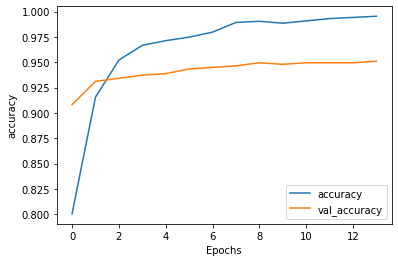

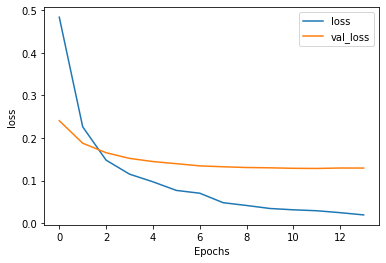

In [6]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [7]:
model_best = tf.keras.models.load_model('../esha/R_CNN')

vid_5_27480.jpg


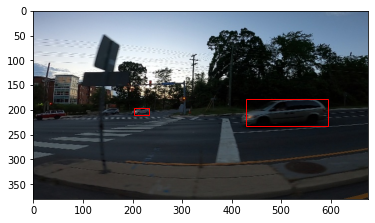

In [40]:
test_files = tf.io.gfile.glob('../data/testing_images/*.jpg')

ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
max_proposed_boxes = 1000

i = '..\\data\\testing_images\\vid_5_27480.jpg'
filename = i.split('\\')[-1]
print(filename)

counter = 0
    
img = load_img(i)
normalized_img_array = img_to_array(img)

ss.setBaseImage(img_to_array(img))
ss.switchToSelectiveSearchFast()
rects = ss.process()

car_boxes = []
probas = []

for (x, y, w, h) in rects:

    if counter <= max_proposed_boxes:
        counter += 1
        filename_box = filename
        proposed_box = [x, y, x + w, y + h]

        image_array = normalized_img_array[proposed_box[1]:proposed_box[3],proposed_box[0]:proposed_box[2]]
        image_array = cv2.resize(image_array,target_size)

        predicted = model_best.predict(image_array.reshape(1,224,224,3), verbose=0)

        if np.argmax(predicted) == 1 and predicted[0][1] >= 0.9:
            car_boxes.append([y, x, y + h, x + w])
            probas.append(predicted[0][1])

img_w, img_h = 676, 380

im = Image.open(i)
fig, ax = plt.subplots()
ax.imshow(im)

try:
    selected_indices = tf.image.non_max_suppression(car_boxes, probas, 100, iou_threshold=0.0)
    selected_boxes = tf.gather(car_boxes, selected_indices)
    for i in selected_boxes:
        ymin, xmin, ymax, xmax = i[0], i[1], i[2], i[3]
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
except:
    pass
plt.show()